In [1]:
from auxilary.simplex import Simplex_CLASS as simplex 
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [59]:
def noisyImageTest(img, noise, alpha):
    # Convert image to float [0, 1]
    image_array = img.astype(np.float32) / 255

    noise = (noise - noise.min()) / (noise.max() - noise.min())  # Normalize to [0, 1]

    # Blend noise with original image
    image_array = (1 - alpha) * image_array + alpha * noise[..., np.newaxis]

    # Convert back to uint8 [0, 255]
    image_array = (image_array * 255).astype(np.uint8)

    return image_array


In [55]:

path = "Dataset/test/0.png"
img = cv2.imread(path)
for iter in range(20):
        simplexObj = simplex()
        img_size = (1000, 1000)
        noise = simplexObj.rand_2d_octaves(img_size, 6, 0.6)
        noisyImage = noisyImageTest(img, noise, 0.3)
        cv2.imwrite("Dataset/sample/simpleNoise/"+str(iter)+".png", noisyImage)

In [58]:
noise = (noise - noise.min()) / (noise.max() - noise.min())  # Normalize to [0, 1]

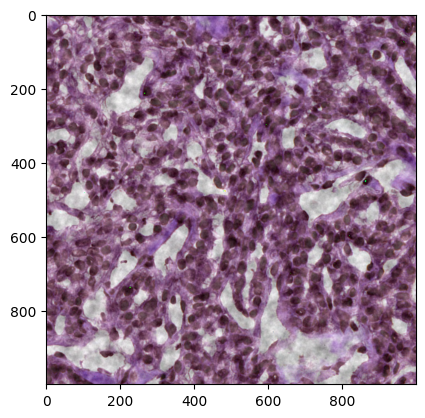

In [53]:
plt.imshow(noisyImage)

In [56]:
from opensimplex import OpenSimplex
import cv2
import numpy as np

def noisyImageTest(img, noise, alpha):
    # Convert image to float [0, 1]
    image_array = img.astype(np.float32) / 255

    # Blend noise with original image
    image_array = (1 - alpha) * image_array + alpha * noise[..., np.newaxis]

    # Convert back to uint8 [0, 255]
    image_array = (image_array * 255).astype(np.uint8)

    return image_array

def generate_noise(simplex, width, height):
    noise_array = np.zeros((height, width))
    for y in range(height):
        for x in range(width):
            noise_array[y, x] = simplex.noise2d(x, y)
    return (noise_array + 1) / 2

path = "Dataset/test/0.png"
img = cv2.imread(path)
img_size = (1000, 1000)

for iter in range(20):
    simplexObj = OpenSimplex(seed=np.random.randint(0, 10000))  # Reinitialize with a new seed
    noise = generate_noise(simplexObj, *img_size)
    noisyImage = noisyImageTest(img, noise, 0.3)
    cv2.imwrite("Dataset/sample/simpleNoise/"+str(iter)+".png", noisyImage*255)


ModuleNotFoundError: No module named 'opensimplex'

In [ ]:
for 